In [1]:
pip install numpy matplotlib tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#we need to augment our data by various features like rotation scaling adding noise colors , etc. :)
# here is the setting for applying these changes
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [7]:
from tensorflow.keras.datasets import mnist

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Example output shapes
print(f'Train Images Shape: {train_images.shape}')
print(f'Train Labels Shape: {train_labels.shape}')
print(f'Test Images Shape: {test_images.shape}')
print(f'Test Labels Shape: {test_labels.shape}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


In [10]:
#preprocessing like normalization between [0, 1], we are using tensor so that is why we have reshape (to show channel dimension)

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


print(f'Reshaped Train Images Shape: {train_images.shape}')

Reshaped Train Images Shape: (60000, 28, 28, 1)


In [11]:
datagen.fit(train_images)

In [13]:
#Here you are ! check your folder:)

for i, (img, label) in enumerate(datagen.flow(train_images, train_labels, batch_size=1, save_to_dir='augmented_mnist_dataset', save_prefix='mnist', save_format='png')):
    if i >= 1000:  # Generate 1000 synthetic images
        break



In [ ]:
# now starting the CNN model


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical


#we should change classes to binary data because the labels are digit from 0 to 9
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [16]:
#defining the layers of our cnn model here

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# we have to check the loss for making sure the predicted label is close to the actual label or no
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# training the model with synthetic data that we produced in a few steps before:)
# Evaluation on training dtaset
history = model.fit(train_images, train_labels, epochs=10,
                    batch_size=64,
                    validation_data=(test_images, test_labels))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.8724 - loss: 0.4295 - val_accuracy: 0.9851 - val_loss: 0.0497
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.9889 - val_loss: 0.0339
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9893 - loss: 0.0335 - val_accuracy: 0.9893 - val_loss: 0.0305
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9919 - loss: 0.0270 - val_accuracy: 0.9907 - val_loss: 0.0293
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9928 - loss: 0.0224 - val_accuracy: 0.9917 - val_loss: 0.0258
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9907 - val_loss: 0.0287
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9963 - loss: 0.0129 - val_accuracy: 0.9909 - val_loss: 0.0334
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 59ms/step - accuracy: 0.9958 - loss: 0.0124 - 

In [20]:

# how model work with test part
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9898 - loss: 0.0385
Test accuracy: 0.9921000003814697


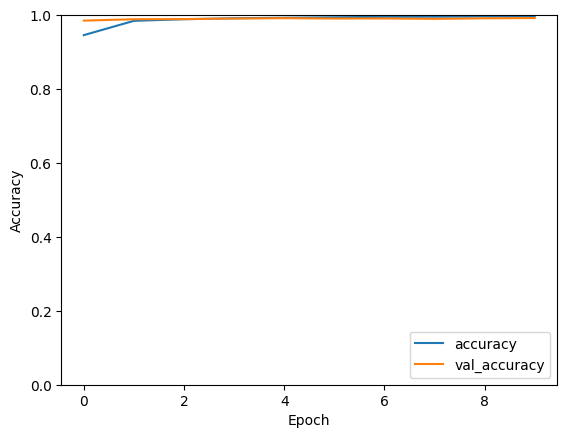

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


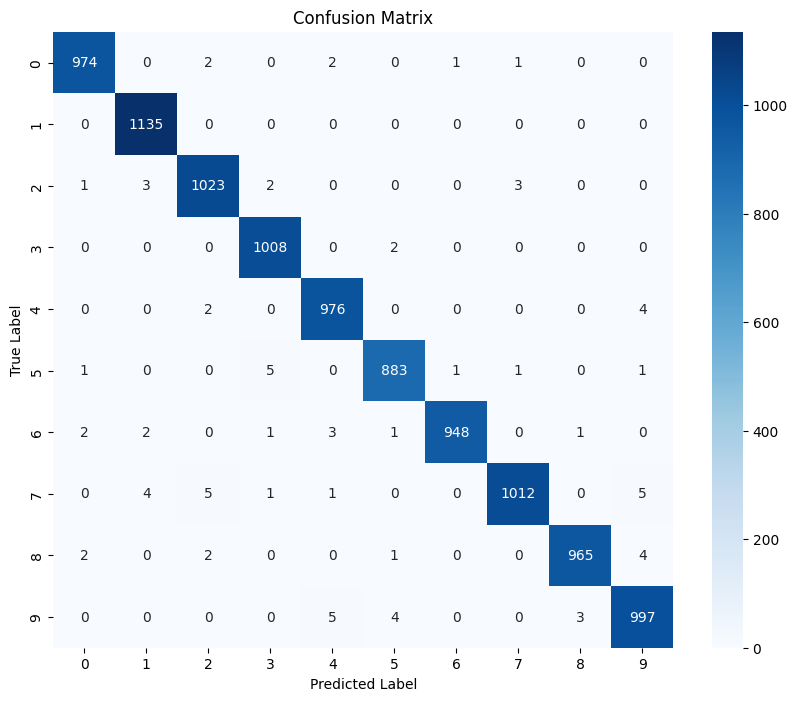

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict on test data
predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


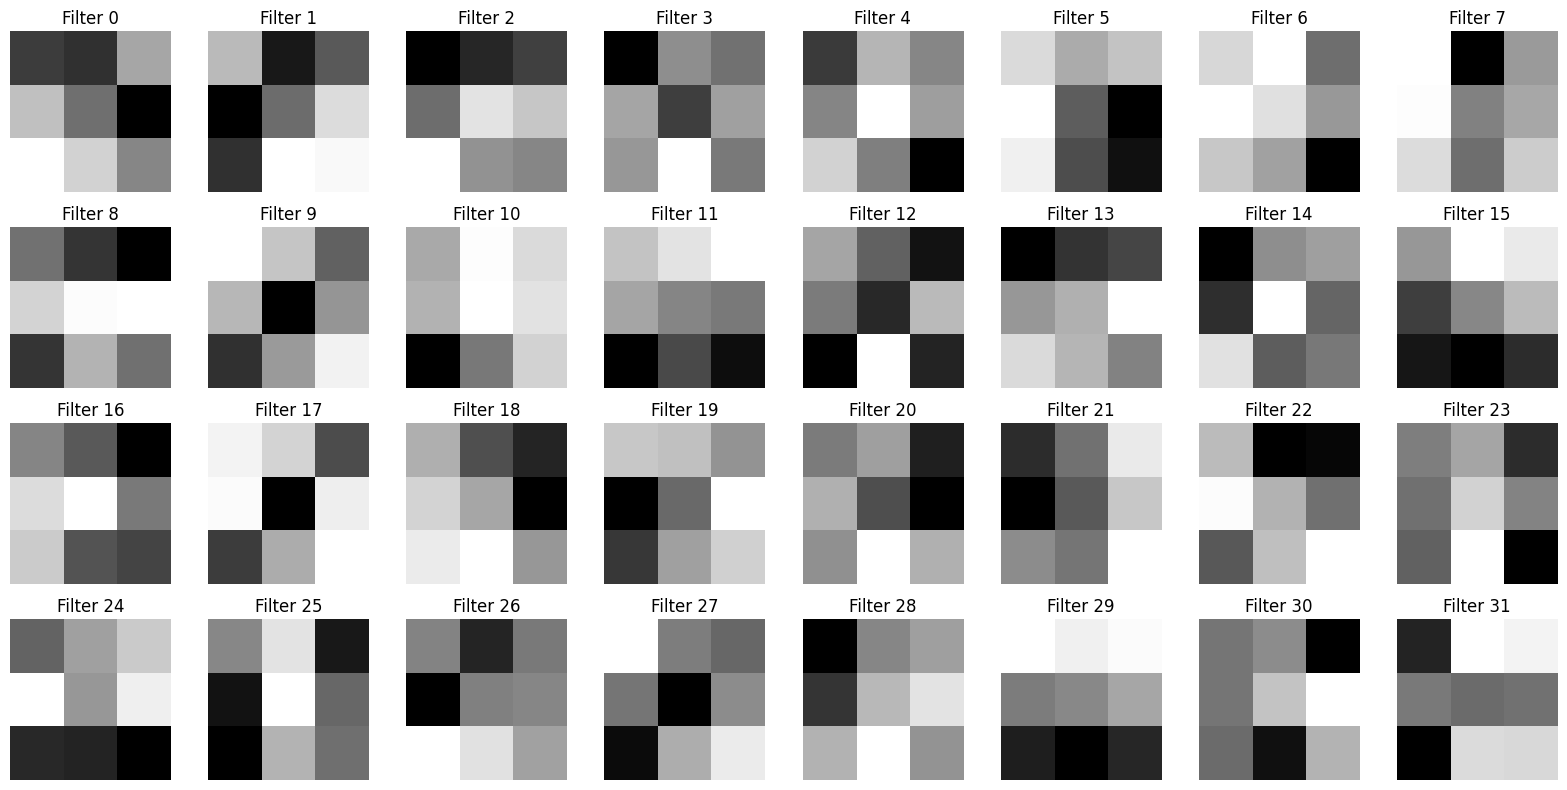

In [25]:
import matplotlib.pyplot as plt

# Get the filters and biases from the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Number of filters in the layer
n_filters = filters.shape[-1]

# Determine the number of rows and columns for the grid
n_columns = 8  # You can adjust this based on how many filters you have
n_rows = (n_filters // n_columns) + (n_filters % n_columns > 0)

# Create a figure to hold the subplots
fig, axes = plt.subplots(n_rows, n_columns, figsize=(n_columns*2, n_rows*2))

# Plot each filter
for i in range(n_filters):
    # Extract the i-th filter
    f = filters[:, :, :, i]

    # Select the subplot
    row = i // n_columns
    col = i % n_columns

    ax = axes[row, col]
    ax.imshow(f[:, :, 0], cmap='gray')
    ax.set_title(f'Filter {i}')
    ax.axis('off')  # Turn off axis

# Remove any empty subplots
for j in range(i+1, n_rows * n_columns):
    fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()
plt.show()


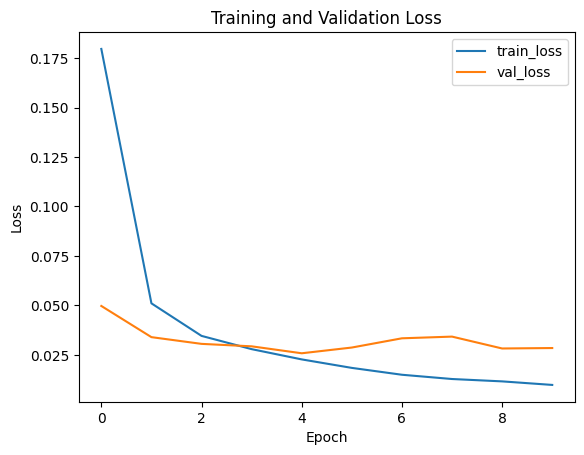

In [26]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


<ipython-input-28-12737491de75>:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', n_classes)


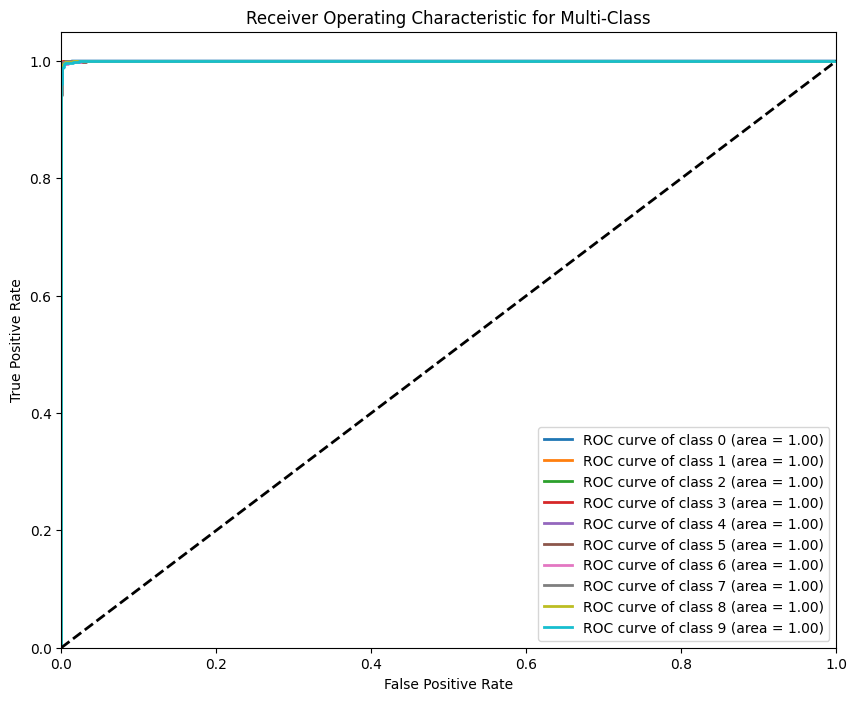

In [28]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have true_labels (one-hot encoded) and predictions (probabilities for each class)
n_classes = 10  # For MNIST, classes are 0 to 9

# Binarize the labels for multi-class ROC curve
true_labels_bin = label_binarize(true_labels, classes=range(n_classes))
predictions_bin = model.predict(test_images)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_bin[:, i], predictions_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i), lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc='lower right')
plt.show()


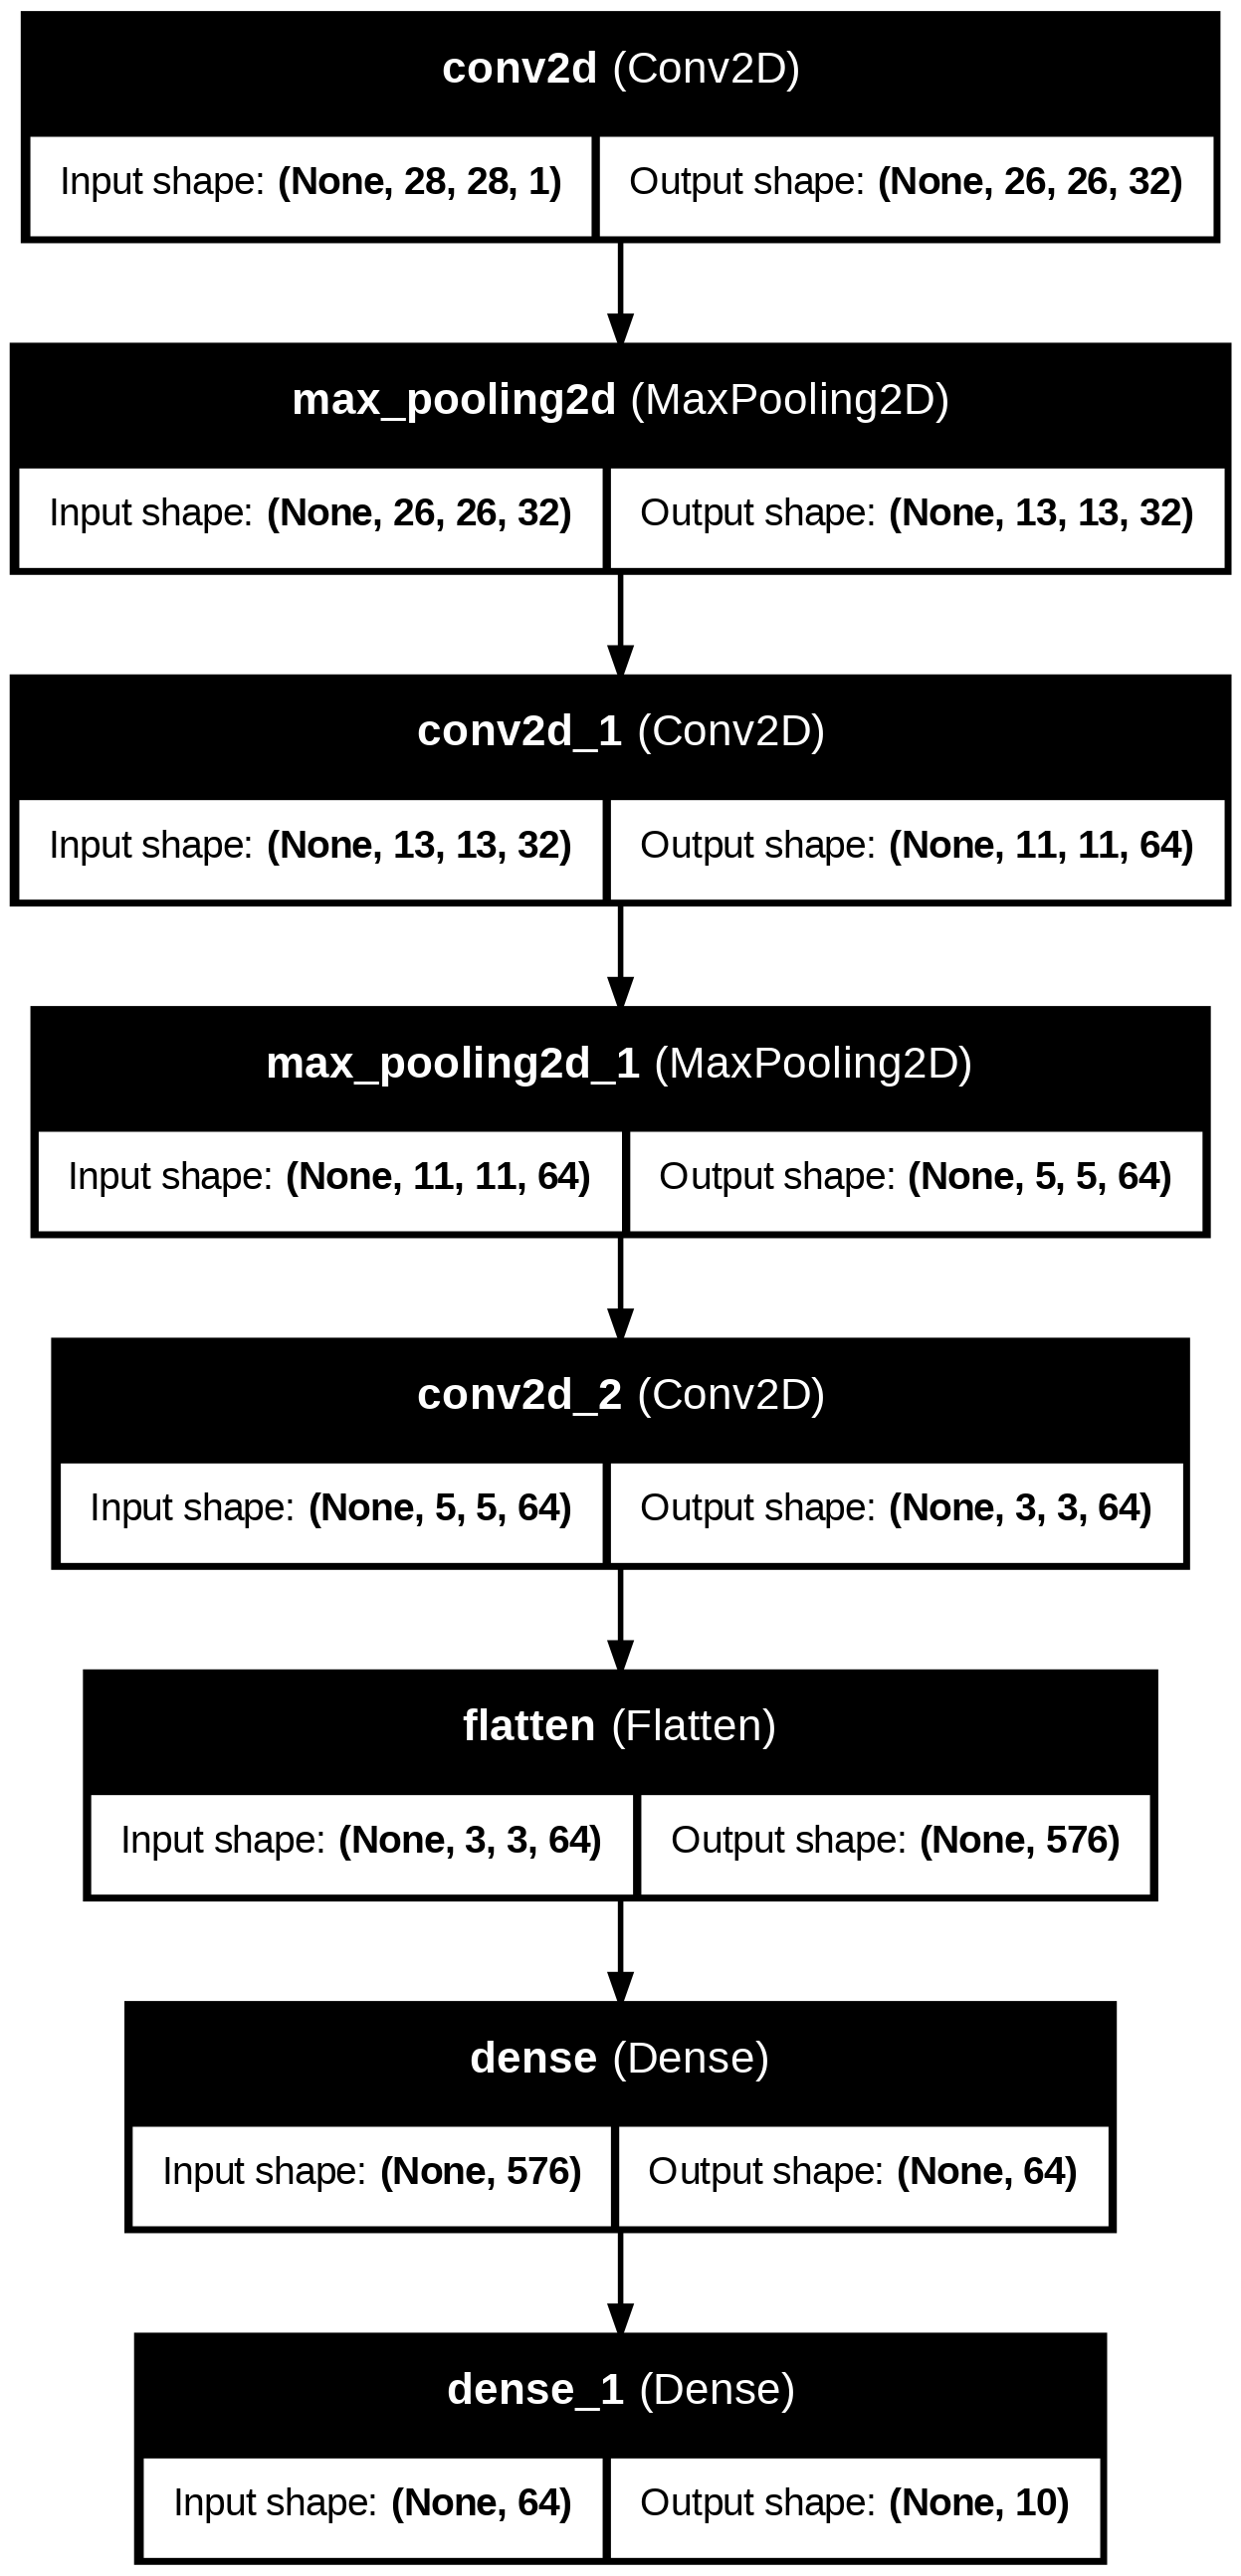

In [29]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
